The goal behind **ensemble methods** is to combine different classifiers into a meta-classifier that has a better generalization performance than each individual classifier alone.[2]

To illustrate why ensemble methods can work better than individual classifiers alone, let's apply the simple concepts of combinatorics. For the following example, we make the assumption that all $n$ base classifiers for a binary classification task have an equal error rate $\varepsilon$. Furthermore, we assume that the classifiers are independent and the error rates are not correlated. Under those assumptions, we can simply express the error probability of an ensemble of base classifiers as a probability mass function of a binomial distribution:

$P\left(y\geq k\right)=\varepsilon_{ensemble}={\displaystyle \sum_{k}^{n}}\binom{n}{k}\varepsilon^{k}\left(1-\varepsilon\right)^{n-k}$

Here, $\binom{n}{k}$ is the binomial coefficient $n$ $choose$ $k$. In other words, we compute the probability that the prediction of the ensemble is wrong. Now let's take a look at a more concrete example of 25 base classifiers ($n=25$) with an error rate of
0.35 $(\varepsilon=0.35)$: [1]

$\varepsilon_{ensemble}={\displaystyle \sum_{k=13}^{25}}\binom{25}{k}0.35^{k}\left(1-0.35\right)^{25-k}=0.06$

**Types of Ensemble Methods**  
**Bagging** - It is also known as bootstrap aggregating, is a technique that repeatedly samples (with replacement) from a data set according to a uniform probability distribution. Each bootstrap sample has the same size as the original data. Because the sampling is done with replacement, some instances may appear several times in the same training set, while others may be omitted from the training set. On average, a bootstrap sample $D_i$ contains approximately 63% of the original training data.  
**Boosting** - It is an iterative procedure used to adaptively change the distribution of training examples so that the base classifiers will focus on examples that are hard to classify. Unlike bagging, boosting assigns weight to each training example and may adaptively change the weight at the end of each boosting round.  
**Random Forest** - This is a class of ensemble methods specifically designed for decision tree classifiers. It combines the prediction made by multiple decision tree, where each tree is generated based on the values of an independent set of random vectors.

<table border="1" align='left' cellpadding="0" cellspacing="0">
    <tr>
        <th>Data Set</th>
        <th>Number of (Records, Attributes, Classes)</th>
        <th>Accuracy Type</th>
        <th>Decision Tree Accuracy(%)</th>
        <th>Bagging Accuracy(%)</th>
        <th>Boosting Accuracy(%)</th>
        <th>Random Forest Accuracy(%)</th>
    </tr>
    <tr>
        <td rowspan="2">Wine</td>
        <td rowspan="2">(178, 14, 3)</td>
        <td>train</td>
        <td>100</td>
        <td>99.9</td>
        <td>100</td>
        <td>100</td>
    </tr>
    <tr>        
        <td>test</td>
        <td>90.4</td>
        <td>95.0</td>
        <td>90.9</td>
        <td>98.9</td>
    </tr>
    <tr>
        <td rowspan="2">Pima Indians Diabetes</td>
        <td rowspan="2">(768, 8, 2)</td>
        <td>train</td>
        <td>100</td>
        <td>99.9</td>
        <td>100</td>
        <td>100</td>
    </tr>
    <tr>        
        <td>test</td>
        <td>68.6</td>
        <td>74.7</td>
        <td>68.6</td>
        <td>76.3</td>
    </tr>
    <tr>
        <td rowspan="2">Breast Cancer</td>
        <td rowspan="2">(569, 30, 2)</td>
        <td>train</td>
        <td>100.0</td>
        <td>100.0</td>
        <td>100.0</td>
        <td>100.0</td>
    </tr>
    <tr>        
        <td>test</td>
        <td>93.0</td>
        <td>96.3</td>
        <td>93.0</td>
        <td>96.7</td>
    </tr>
    <tr>
        <td rowspan="2">German Credit</td>
        <td rowspan="2">(1000, 24, 2)</td>
        <td>train</td>
        <td>100.0</td>
        <td>100.0</td>
        <td>100.0</td>
        <td>100.0</td>
    </tr>
    <tr>        
        <td>test</td>
        <td>69.4</td>
        <td>77.3</td>
        <td>68.5</td>
        <td>75.9</td>
    </tr>
</table>

In [1]:
from scipy.misc import comb
import math

def ensemble_error(n_classifier, error):
    k_start = math.ceil(n_classifier / 2.0)
    probs = [comb(n_classifier, k) * error**k * (1-error)**(n_classifier-k)
                for k in range (k_start, n_classifier + 1)]
    return sum(probs)

In [2]:
# 25 base classifiers and each with base
ensemble_error(25, 0.35)

0.060444913567020482

In [3]:
import numpy as np
error_range = np.arange(0.0, 1.01, 0.01)
ens_errors = [ensemble_error(n_classifier=11, error=error)
                  for error in error_range]

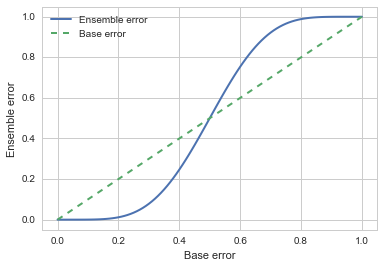

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

%matplotlib inline
plt.plot(error_range, ens_errors, label='Ensemble error', linewidth=2)
plt.plot(error_range, error_range, linestyle='--', label='Base error', linewidth=2)
plt.xlabel('Base error')
plt.ylabel('Ensemble error')
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [132]:
import pandas as pd

In [133]:
def benchmark_clf(clf_name, clf, X, y, kfold):
    train_scores, test_scores = [], []
    for k, (train, test) in enumerate(kfold):
        X_train = X.iloc[train]
        y_train = y[train]
        X_test = X.iloc[test]
        y_test = y[test]
        
        clf.fit(X_train, y_train)

        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)

        train_score = metrics.accuracy_score(y_train, y_train_pred)
        test_score = metrics.accuracy_score(y_test, y_test_pred)

        #score = pipe_lr.score(X_train[test], y_train[test])
        train_scores.append(train_score)
        test_scores.append(test_score)
        #print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train[train]), score))

    #print('CV accuracy scores: %s' % scores)    
    print('%s train/test accuracies %.3f/%.3f' % (clf_name, np.mean(train_scores), np.mean(test_scores)))

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.cross_validation import train_test_split, StratifiedKFold

def split_data_and_benchmark_clf(X, y):
    kfold = StratifiedKFold(y=y, n_folds=10, random_state=1)

    tree = DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=None,
                                  random_state=1)

    # BaggingClassifier with BaseEstimators of 50 DecisionTreeClassifiers
    bag = BaggingClassifier(base_estimator=tree,
                            n_estimators=50, 
                            bootstrap=True, 
                            bootstrap_features=False, 
                            n_jobs=1, 
                            random_state=1)

    # AdaBoostClassifier with BaseEstimators of 50 DecisionTreeClassifiers
    ada = AdaBoostClassifier(base_estimator=tree,
                             n_estimators=50, 
                             learning_rate=0.1,
                             random_state=1)
    
    # RandomForestClassifier with BaseEstimators of 50 DecisionTreeClassifiers
    rnf = RandomForestClassifier(n_estimators=50,
                             random_state=0)
    
    # Benchmark Decision Tree
    benchmark_clf('Decision tree', tree, X, y, kfold)

    # Benchmark BaggingClassifier with BaseEstimator as a DecisionTreeClassifier
    benchmark_clf('Bagging', bag, X, y, kfold)
    
    # Benchmark AdaBoostClassifier with BaseEstimator as a DecisionTreeClassifier
    benchmark_clf('AdaBoost', ada, X, y, kfold)
    
    # Benchmark RandomForestClassifier with BaseEstimator as a DecisionTreeClassifier
    benchmark_clf('RandomForest', rnf, X, y, kfold)    

### Wine Dataset

In [135]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
col_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 
'Alcalinity of ash', 'Magnesium', 'Total phenols', 
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
wine_df = pd.read_csv(url, header=None, names = col_names)

In [136]:
wine_df.head(5)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [137]:
X = wine_df.drop('Class', axis = 1)
y = wine_df['Class']
print(X.shape)
print(len(y.unique()))

(178, 13)
3


In [138]:
split_data_and_benchmark_clf(X, y)

Decision tree train/test accuracies 1.000/0.904
Bagging train/test accuracies 0.999/0.950
AdaBoost train/test accuracies 1.000/0.909
RandomForest train/test accuracies 1.000/0.989


### Pima Indians Diabetes Dataset

In [163]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin_fold', 'serum_insulin', 'bmi', 'pedigree', 'age', 'label']
pima_df = pd.read_csv(url, header=None, names=col_names)
pima_df.head(5)

,pregnant,glucose,bp,skin_fold,serum_insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [140]:
X = pima_df.drop('label', axis = 1)
y = pima_df['label']
print(X.shape)
print(len(y.unique()))

(768, 8)
2


In [141]:
# do stratified K Fold splitting and Benchmark the data
split_data_and_benchmark_clf(X, y)

Decision tree train/test accuracies 1.000/0.686
Bagging train/test accuracies 0.999/0.747
AdaBoost train/test accuracies 1.000/0.686
RandomForest train/test accuracies 1.000/0.763


### Breast Cancer Wisconsin dataset

In [142]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
#col_names = ['id', 'diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave points', 'symmetry', 'fractal dimension']
wdbc_df = pd.read_csv(url, header=None)
wdbc_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [153]:
from sklearn.preprocessing import LabelEncoder
X = wdbc_df.loc[:, 2:]
y = wdbc_df.loc[:, 1]
print(X.shape)
print(len(y.unique()))

(569, 30)
2


In [154]:
le = LabelEncoder()
y = le.fit_transform(y)
le.transform(['M', 'B'])

array([1, 0], dtype=int64)

In [156]:
# do stratified K Fold splitting and Benchmark the data
split_data_and_benchmark_clf(X, y)

Decision tree train/test accuracies 1.000/0.930
Bagging train/test accuracies 1.000/0.963
AdaBoost train/test accuracies 1.000/0.930
RandomForest train/test accuracies 1.000/0.967


### German Credit dataset

In [160]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric'
#col_names = ['Account Status', 'Duration', 'Credit History', 'Purpose', 'Credit Amount', 'Savings account/bonds', 'Present Employment Since', 'Installment Rate as % of Income', 'Personal status and sex', 'Other debtors / guarantors', 'Present residence since', 'Property', 'Age ','Other installment plans','Housing','Number of existing credits at this bank','Job','Number of people being liable to provide maintenance for','Telephone','foreign worker','class']
german_credit_df = pd.read_table(url, header=None, sep='\\s+')
german_credit_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [161]:
X = german_credit_df.loc[:, :23]
y = german_credit_df.loc[:, 24]
print(X.shape)
print(len(y.unique()))

(1000, 24)
2


In [162]:
# do stratified K Fold splitting and Benchmark the data
split_data_and_benchmark_clf(X, y)

Decision tree train/test accuracies 1.000/0.694
Bagging train/test accuracies 1.000/0.773
AdaBoost train/test accuracies 1.000/0.685
RandomForest train/test accuracies 1.000/0.759


**References**  
[1] Python Machine Learning - Sebastian Raschka  
[2] Introduction to Data Mining - Pang Ning Tan, Michael Steinbach, Vipin Kumar